In [1]:
#import necessary packages
import numpy as np
import pandas as pd
from sklearn.clusters import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from collections import Counter

In [6]:
#load the data
df=pd.read_csv('C:/Users/Admin/Desktop/Kittu/iris.csv')
df.head() #setosa,versicolor,virginica

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df.shape

(150, 5)

In [11]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [12]:
Counter(df.target)

Counter({0: 50, 1: 50, 2: 50})

In [14]:
X=df.iloc[:,:-1]
X.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [30]:
model=KMeans(n_clusters=3,random_state=3)
model.fit(X)
model.labels_#gives us the output of the trained model

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [31]:
accuracy_score(df.target,model.labels_)

0.8933333333333333

In [33]:
confusion_matrix(df.target,model.labels_)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

In [36]:
pd.crosstab(df.target,model.labels_)#setosa,versicolor,virginica

col_0,0,1,2
target,,,
0,50,0,0
1,0,48,2
2,0,14,36


visualization

In [53]:
y=pd.DataFrame(df.target)
y.head(2)

,target
0,0
1,0


In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'this is the actual dataset')

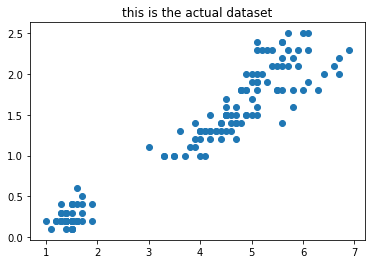

In [43]:
plt.scatter(x=df.petal_length,y=df.petal_width)
plt.title('this is the actual dataset')

In [44]:
color=np.array(['red','blue','green'])

Text(0.5, 1.0, 'this is the actural dataset')

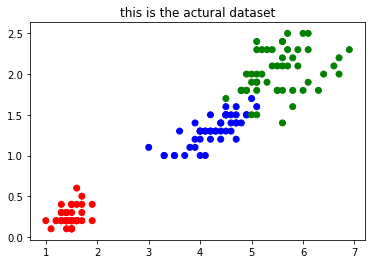

In [47]:
plt.scatter(x=df.petal_length,y=df.petal_width,c=color[df.target])
plt.title('this is the actual dataset')

Text(0.5, 1.0, 'prediction')

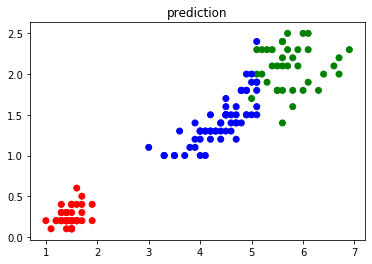

In [49]:
plt.scatter(x=df.petal_length,y=df.petal_width,c=color[model.labels_])
plt.title('prediction')

#Elbow technique
- to find the number of clusters hidden in the data or to find KMeans
- K= 1 to 17 we calculate distortion and then we plot graph K and the    
  distortion
- Distortion - Avg distance of the points to the centroid
- d decreases as the number of cluster increases 

In [54]:
from scipy.spatial.distance import cdist

In [56]:
X=df.iloc[:,[2,3]]

In [62]:
#K means to determine K
distortions = [ ]
K= range(1,20) #max
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X,kmeanModel.cluster_centers_,'euclidean'),axis=1))/X.shape[0])

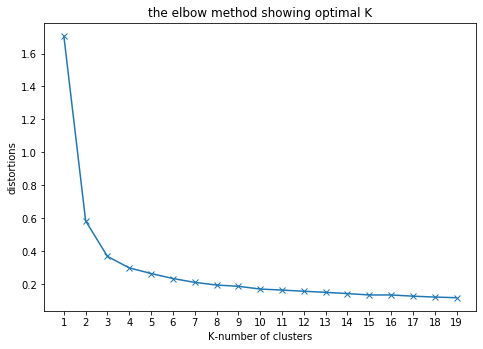

In [63]:
#plot the elbow
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_xticks(range(1,25))
ax.set_xlabel('K-number of clusters')
ax.set_ylabel('distortions')
ax.set_title('the elbow method showing optimal K')
ax.plot(K,distortions,marker='x')
plt.show()